Чтобы воспользовать нормальным распределением необходимо импортировать класс `scipy.stats.norm`

`loc` - это среднее выборки

`scale` - это стандартное отклонение сигма

Методы класса:

`norm().cdf(x)` - функция распределения в точке х

`norm().ppf(q)` - получить квантиль распределения

`norm().pdf(x)` - получить плотность распределения в точке х

In [1]:
from scipy.stats import norm
standart_norm = norm(loc=0, scale=1)
print(f'P(X<=2) = {standart_norm.cdf(x=2)}')
print(f'или так: {norm(loc=0, scale=1).cdf(x=2)}')

P(X<=2) = 0.9772498680518208
или так: 0.9772498680518208


Можно указывать массивы

In [4]:
print(f'P(X <= 2 and X <= -1) = {standart_norm.cdf(x=[2, -1])}')

P(X <= 2 and X <= -1) = [0.97724987 0.15865525]


In [12]:
print(f'quantile 0.975: {standart_norm.ppf(q=0.975)}')

quantile 0.975: 1.959963984540054


In [16]:
print(f'pdf(0) = {standart_norm.pdf(x=0)}')

pdf(0) = 0.3989422804014327


Нарисуем график нормального распределения

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

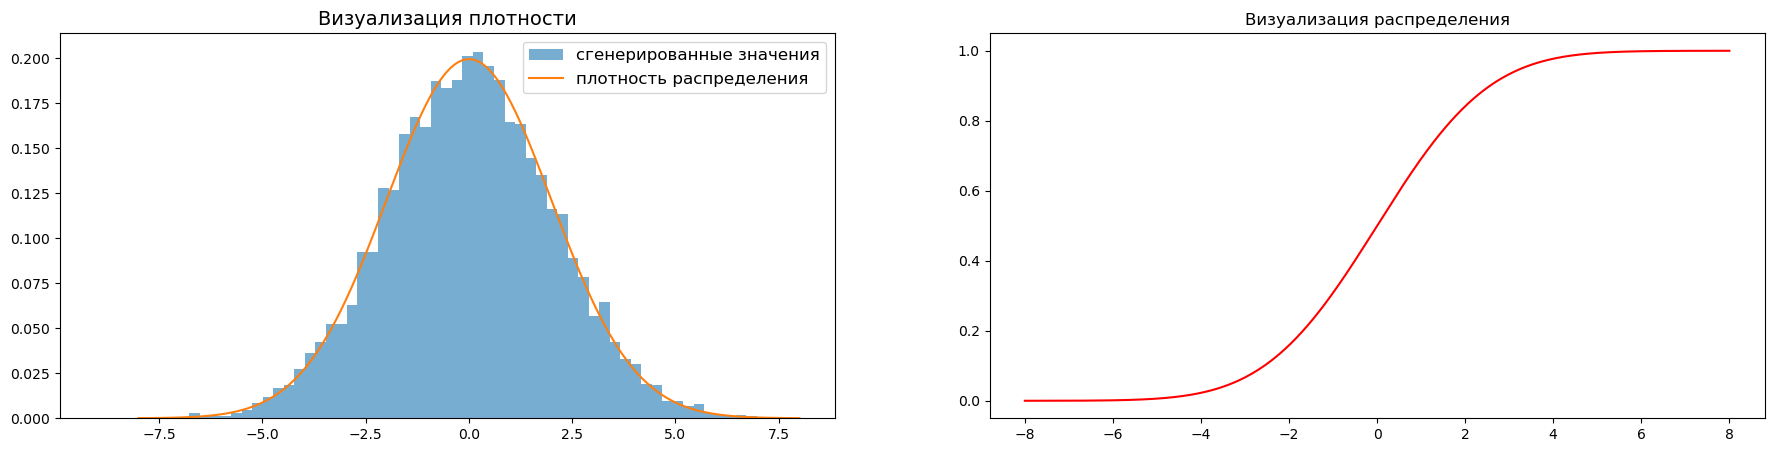

In [21]:
check_distr = norm(loc=0, scale=2)
x = np.linspace(-8, 8, 1000)
pdf = check_distr.pdf(x)
cdf = check_distr.cdf(x)
sample = check_distr.rvs(10000)

plt.figure(figsize=(22, 5))

plt.subplot(1, 2, 1)
plt.title('Визуализация плотности', fontsize=14, color='black')
plt.hist(sample, bins='auto', density=True, alpha=0.6, label='сгенерированные значения')
plt.plot(x, pdf, label='плотность распределения')
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.title('Визуализация распределения', fontsize=12, color='black')
plt.plot(x, cdf, color='red')
plt.show()

In [23]:
from scipy.stats import binom

In [25]:
def binom_generator(n, p, size):
    return binom(n=n, p=p).rvs(size)

In [27]:
p_value = 1 - binom.cdf(19-1, n=30, p=0.5)
p_value

0.10024421103298664

Посчитаем p-value для нашей старой задачи с доставкой, где Н0: mu0=0.5, H1: mu>0.5

In [30]:
def get_old_pvalue(n, mu, t):
    return 1 - binom.cdf(t-1, n=n, p=mu)

In [32]:
n = 30
mu = 0.5
t = 19
print(f'p-value for binom: {round(get_old_pvalue(n, mu, t), 3)}')

p-value for binom: 0.1


In [34]:
def get_pvalue_by_normal_approx(n, mu, t):
    sum_mu = n * mu
    variance_mu = n * mu * (1 - mu)
    sigma = np.sqrt(variance_mu)
    return 1 - norm(loc=sum_mu, scale=sigma).cdf(t)

In [36]:
print(f'p-value for norm approx: {round(get_pvalue_by_normal_approx(n, mu, t), 3)}')

p-value for norm approx: 0.072


Видим что `p-value`, полученные от биноминального распределения и нормального сильно отличаются (0.07 - это дает нам право отвергнуть Н0, а 0.1 не дает её отвергнуть). Но в реальной жизни не делается вывод по 30-ти экспериментам. Пусть их у нас будет 3000, H0: $\mu$=0.5, а количество успехов - 1544

In [39]:
n = 3000
mu = 0.5
t = 1544
print(f'p-value for binom: {round(get_old_pvalue(n, mu, t), 3)}')
print(f'p-value for norm approx: {round(get_pvalue_by_normal_approx(n, mu, t), 3)}')

p-value for binom: 0.056
p-value for norm approx: 0.054


Видим, что `p-value` в обоих случаях в районе 0.05, что позволит нам спокойно отвергнуть нулевую гипотезу. Значит, для большого количества n нормальная аппроксимация работает отлично

Существует замечательный инструмент который помогает нам легко и быстро посчитать p-value. Он называется Z-критерий Фишера. Напишем его функцию и сравним с поиском p-value при нормальной аппроксимации

In [43]:
def z_kriterion_pvalue(sample_size, sample_mean, mu0, variance):
    z_statistics = np.sqrt(sample_size) * (sample_mean - mu0) / np.sqrt(variance)
    return 1 - norm().cdf(z_statistics)
n = 30
t = 19
mu = 0.5
variance = mu * (1 - mu)
print(f'p-value for binom: {round(get_old_pvalue(n, mu, t), 3)}')
print(f'p-value for norm approx: {round(get_pvalue_by_normal_approx(n, mu, t), 3)}')
print(f'p-value for z-kriterion: {round(z_kriterion_pvalue(n, t/n, mu, variance), 3)}')

p-value for binom: 0.1
p-value for norm approx: 0.072
p-value for z-kriterion: 0.072


На маленьких значениях `p-value` при нормальной аппроксимации получается сильно различным по сравнению с `p-value`, полученном при бинальном распределении. Это можно исправить, если из `get_pvalue_by_normal_approx` при применении кумулятивной функции вычесть 0.5. Это называется `поправкой на непрерывность` или `continuity correction` 

In [48]:
def get_pvalue_by_normal_approx(n, mu, t):
    sum_mu = n * mu
    variance_mu = n * mu * (1 - mu)
    sigma = np.sqrt(variance_mu)
    return 1 - norm(loc=sum_mu, scale=sigma).cdf(t-0.5)
n = 30
t = 19
mu = 0.5
print(f'p-value for norm approx: {round(get_pvalue_by_normal_approx(n, mu, t), 3)}')

p-value for norm approx: 0.101
